# 🌟 Introduction

Polynomial regression is an algorithm that is well known. It is a special case of linear regression, by the fact that we create some polynomial features before creating a linear regression.

With scikit learn, it is possible to create one in a pipeline combining these two steps (Polynomialfeatures and LinearRegression). I will show the code below. And let’s see an example, with some simple toy data, of only 10 points. Let’s also consider the degree to be 9. You can see the final result below.

<img src='img/polynomial_1.png'>

Do you see anything wrong?

Well, in theory, this is wrong! <b>For 10 points, a 9th-degree polynomial should fit them perfectly!</b>

Or maybe, I am sure that some of you are thinking: why are you saying that this is wrong? This may be the right model. You think that the model should fit perfectly, but no, you are confused with <b>polynomial interpolation!</b>

First, you can try it for yourself using the following code to create the model.

## Creating some toy data

In [19]:
import pandas as pd
xdic={'X': {11: 300, 12: 170, 13: 288, 14: 360, 15: 319, 16: 330, 17: 520, 18: 345, 19: 399, 20: 479}}
ydic={'y': {11: 305000, 12: 270000, 13: 360000, 14: 370000, 15: 379000, 16: 405000, 17: 407500, 18: 450000, 19: 450000, 20: 485000}}
X=pd.DataFrame.from_dict(xdic)
y=pd.DataFrame.from_dict(ydic)
import numpy as np
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

## Creating the model

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=9
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=9, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

## Creating the plot

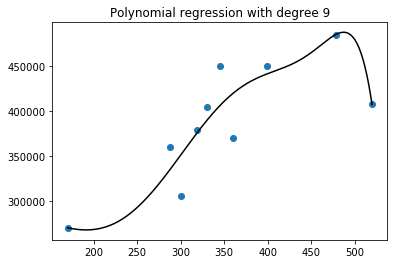

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

# ❌ You should not be doing this!

Before talking about the difference between <b>polynomial regression</b> and <b>polynomial interpolation.</b> Let’s first talk about an answer that I got from the scikit learn team: you should not be doing this, expansion to a 9th-degree polynomial is nonsense. And scikit learn is built for practical use cases, and it works with finite-precision representations, not theoretical representations.

Yes, they are totally right! Just look at the numbers, how big they become: 1e24!

But if they cannot handle big numbers, shouldn’t they throw an error or a warning? Without any message, one will just consider that the model is correct, whereas, well, it is actually not.

OK OK, I know, some of you are not convinced that the result is wrong, or maybe it is impossible to handle big numbers, let see with another package, numpy!

## But polyfit does it well

For the same example, polyfit from numpy has no problem to find the model. You can see the plot and the code below.

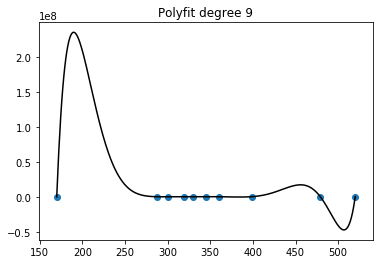

In [22]:
coefs = np.polyfit(X.values.flatten(), y.values.flatten(), 9)
plt.figure()
plt.plot(X_seq, np.polyval(coefs, X_seq), color="black")
plt.title("Polyfit degree "+str(degree))
plt.scatter(X,y)
plt.show()

Now I know some of you are thinking: polyfit is a very different thing, it is an interpolation and not regression.

<b>polyfit is doing an altogether different thing. It is performing a univariate polynomial fit for some vector x to a vector y. Here we are performing a polynomial expansion of some feature space X in order to represent high-order interaction terms (equivalent to learning with a polynomial kernel) for a multivariate fit.</b>

OK, what is a <b>polynomial interpolation?</b>

# ❓ What is Polynomial interpolation

Well, for this kind of question, Wikipedia is a good source.

# In numerical analysis, polynomial interpolation is the interpolation of a given data set by the polynomial of lowest possible degree that passes through the points of the dataset.

And we have this result that is proven: given n+1 distinct points x_0,x_0,… ,x_n and corresponding values y_0,y_1,… ,y_n, there exists a unique polynomial of degree at most n that interpolates the data (x_0,y_0),… ,(x_n,y_n).

Going back to our example: there are 10 points, and we try to find a 9th-degree polynomial. So technically, we are doing polynomial interpolation. And polyfit found this unique polynomial! which is not the case for <b>scikit learn’s polynomial regression pipeline!</b>

And this is precisely why some of you are thinking: <b>polyfit</b> is different from <b>scikit learn’s polynomial regression pipeline!</b>

Now wait!

In <b>polyfit</b>, there is an argument, called degree. So you can modify the degree, let’s try with 5.

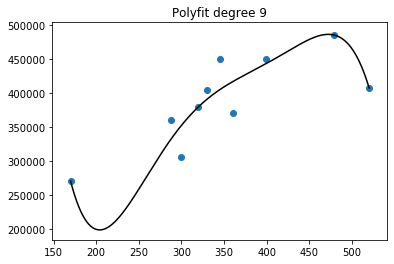

In [23]:
coefs = np.polyfit(X.values.flatten(), y.values.flatten(), 5)
plt.figure()
plt.plot(X_seq, np.polyval(coefs, X_seq), color="black")
plt.title("Polyfit degree "+str(degree))
plt.scatter(X,y)
plt.show()

Yes, with <b>polyfit,</b> it is possible to choose the degree of the polynomial and we are doing <b>polynomial regression</b> with it. And the degree 9, chosen by the user, is the <b>special case of polynomial interpolation.</b>

And it is reassuring because the linear regression tries to minimize the squared error. And we know that if there are 10 points, and we try to find a polynomial of degree 9, then the error can be 0 (can’t be lower!) because of the theorem of polynomial interpolation.

For those who are still doubting, there is the official document for polyfit: Least squares polynomial fit. Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.

OK, time to go back to our <b>scikit learn’s polynomial regression pipeline.</b> So now, why the difference? Are there really two different polynomial regression (or fit), using both Least Squares, but using them differently?

I found this answer, but I am not getting it yet.

<b>Both models uses Least Squares, but the equation on which these Least Squares are used is completely different. polyfit applies it on the vandemonde matrix while the linear regression does not.</b>

# Feature Scaling effect

While digging around, another important transformation of features should be mentioned: feature scaling.

In several books of machine learning, when performing polynomial regressions, the features are scaled. Maybe from the beginning, some of you were saying that is should be done.

And yes, <b>scikit learn’s polynomial regression pipeline with the feature scaling,</b> seems to be equivalent to polyfit! according to the plot (I didn’t really check, but visually they are the same).

You can use the code below:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
degree=9
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=9, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Now, we didn’t answer our previous questions, and we have more questions: <b>does feature scaling has an effect on linear regression?</b>

Well the answer is No.

To discuss this, there can be another article written and for our discussion about the effect of polynomial regression, we can just do another transformation.

In [8]:
X=pd.DataFrame.from_dict(xdic)/1000

That’s right, you just divide the predictors by 1000. Now, you know that the effect on the linear regression model is only proportional, but in practice, the difference is huge.

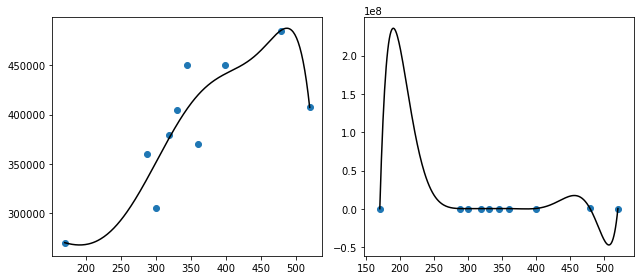

In [24]:
coefs = np.polyfit(X.values.flatten(), y.values.flatten(), 9)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axes[0].scatter(X,y)
axes[0].plot(X_seq,polyreg.predict(X_seq),color="black")
axes[1].plot(X_seq, np.polyval(coefs, X_seq), color="black")
axes[1].scatter(X,y)
fig.tight_layout()

<b>*left one is Polynomial regression with degree 9 and *right one is Polynomial regression with degree 9</b>

# 🤖 Conclusion

In the end, we can say that <b>scikit learn’s polynomial regression pipeline (with or without scaling)</b>, should be equivalent to numpy’s polyfit, but the difference in terms of big number handling can create different results.
And personally, I think that scikit learn should throw an error or at least a warning in this case.